## Logistic Regression을 사용해서 와인 데이터 분류
- 예측값이 0.5보다 작을 경우는 0, 0.5보다 클 경우 1로 예측(이진 분류)

#### 와인 데이터를 이용한 이진분류

- 포르투갈의 비뉴 베르드 지방에서 만들어진 와인을 측정한 데이터
- 데이터 셋 구성
    
    -레드와인 :1599개 / 화이트와인: 4898개/ 총 6497개
    
    -12개의 특성과 1개의 클래스(레이블)로 구성됨

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
from sklearn.linear_model import LogisticRegression

In [2]:
wine = pd.read_csv('wine.csv')

In [3]:
wine

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
del wine['Unnamed: 0']

In [5]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
x = wine.iloc[:,1:]
y = wine['type']
#데이터 정의

In [7]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int64

In [9]:
wine.info()
#결측치 확인을 위한 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size=0.3,
                                                random_state=0)
#데이터를 train데이터와 test데이터로 분할. test데이터의 비율은 30%

In [11]:
lr= LogisticRegression(C=1,max_iter=1000)
#로지스틱 회귀, C = 1(생략 = 기본값), max_iter=1000 (기본값은 100)
#학습모델 자체에도 random state가 있는 모델이 존재한다.
#같은 데이터를 얻고 싶다면 모델 자체에도 random state를 0으로 조절해주면 된다.

In [12]:
lr.fit(x_train,y_train)

LogisticRegression(C=1, max_iter=1000)

In [13]:
train_score = lr.score(x_train,y_train)
test_score = lr.score(x_test,y_test)
print("train score:",train_score)
print("test score:",test_score)
print('train,test score의 차이:',abs(train_score-test_score))
#로지스틱 회귀는 분류이기 때문에 기준은 Accuracy(정확도)이다.

train score: 0.984605234220365
test score: 0.9887179487179487
train,test score의 차이: 0.004112714497583658


## 최적의 C값 찾기

In [14]:
c_list = [0.001,0.01,0.1,1,10,100,1000]
train_acc=[]
test_acc=[]

In [15]:
#최적의 C값을 찾기 위한 for문 구현
for i in c_list:
    #모델 선언 및 학습
    lr = LogisticRegression(C=i,max_iter=10000)
    lr.fit(x_train,y_train)
    
    #train데이터 정확도 산출 
    train_score = lr.score(x_train,y_train)
    train_acc.append(train_score)
    
    #test데이터 정확도 산출
    test_score = lr.score(x_test,y_test)
    test_acc.append(test_score)

In [16]:
train_acc

[0.9375412359797669,
 0.9467780954475479,
 0.9703100945678469,
 0.984605234220365,
 0.9859247855729052,
 0.9872443369254453,
 0.9879041126017154]

In [17]:
test_acc

[0.9420512820512821,
 0.9523076923076923,
 0.9728205128205129,
 0.9887179487179487,
 0.9912820512820513,
 0.9912820512820513,
 0.9902564102564102]

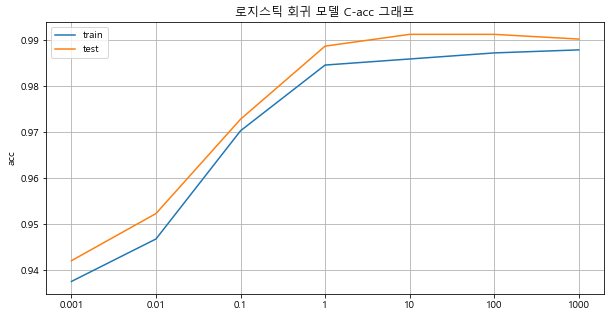

In [18]:
plt.figure(figsize=(10,5))
plt.plot(train_acc,label='train')
plt.plot(test_acc,label='test')
plt.title('로지스틱 회귀 모델 C-acc 그래프')
plt.ylabel('acc')
plt.xticks(np.arange(7),c_list)
plt.legend()
plt.grid()
plt.show()

## GridSearch

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000]}

In [21]:
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=5)

In [22]:
grid_search.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [23]:
print('최적 매개변수:',grid_search.best_params_)
print('최고 교차 검증 점수 :',grid_search.best_score_ )
#.best_params_ = 최적의 매개변수를 뽑음.
#.best_score_ = 최고의 교차 검증 점수를 뽑음

최적 매개변수: {'C': 100}
최고 교차 검증 점수 : 0.9793263941778794
